In [1]:
#https://huggingface.co/datasets/tanooki426/Datasets_EN

import os
import csv
import zipfile
import pandas as pd
import numpy as np
import shutil as sh

In [13]:
base = r'G:\BioML_Datasets\Split'
data = r'G:\BioML_Datasets\DatasetV2'
trainpath = r'G:\BioML_Datasets\DatasetV2\Train'
testpath = r'G:\BioML_Datasets\DatasetV2\Test'
keywords = np.array(['let', 'go', 'hold', 'general'])

if os.path.exists(data):
    sh.rmtree(data)
os.mkdir(data)
os.mkdir(trainpath)
os.mkdir(testpath)

testn = 10
testp = testn/100

with open(data + '\\train.csv', mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['new_id', 'keyword'])
    csvfile.close()
with open(data + '\\test_idx.csv', mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['new_id', 'keyword'])
    csvfile.close()
with open(data + '\\test_idx.csv', mode='a', newline='') as csvtest:
    testwriter = csv.writer(csvtest)
    with open(data + '\\train.csv', mode='a', newline='') as csvtrain:
        trainwriter = csv.writer(csvtrain)
        q = 0  
        for folder in os.listdir(base):
            cur_folder = os.path.join(base,folder)
            numtest = int(len(os.listdir(cur_folder)) * testp) + 1
            print(len(os.listdir(cur_folder)))
            print(numtest)
            i = 0
            n = 0
            k = 0
            
            for file in os.listdir(cur_folder):
                cur_file = os.path.join(cur_folder,file)
                name, word = file.split("_")
                word, ext = word.split(".")
                try:
                    word, maybe = word.split("0",1)
                except:
                    temp = 1
                if word in keywords:
                    if not i%testn and k < numtest:
                        sh.copy(cur_file, testpath)
                        testwriter.writerow([file,word])
                        print(file) 
                        i += 1
                        k += 1
                    else:
                        sh.copy(cur_file, trainpath)
                        trainwriter.writerow([file,word]) 
                        i += 1
                n += 1
                q += 1

38
4
angie-135_general001.wav
angie-69_general003.wav
cow-11_general005.wav
cow-3_general007.wav
48
5
angie-110_go.wav
cow-54_go.wav
elena-52_go.wav
markus-103_go.wav
valerie-172_go.wav
15
2
angie-107_hold.wav
markus-352_hold.wav
31
4
angie-135_let.wav
irene-45_let.wav
markus-7_let.wav
wario-54_let.wav


Text(0.5, 1.0, 'Log-Mel angie-108_hold.wav (Filtered)')

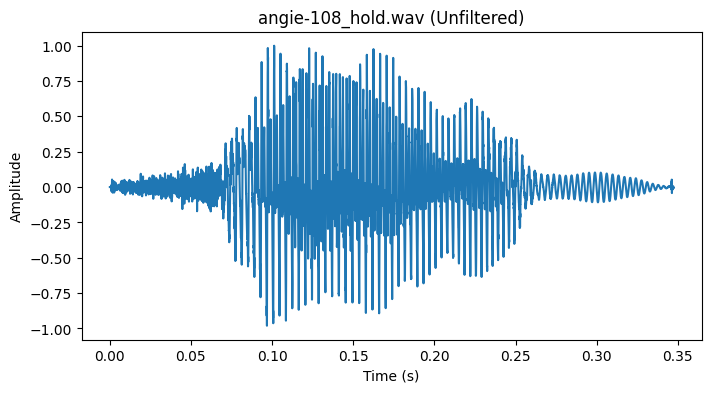

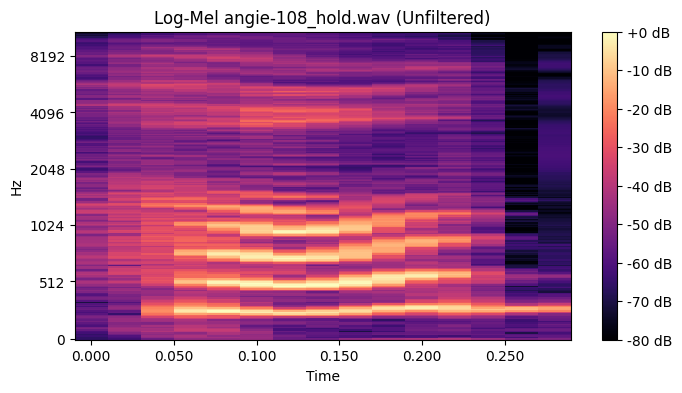

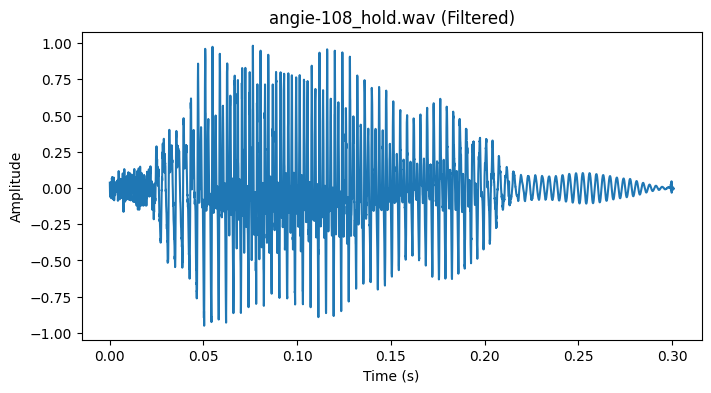

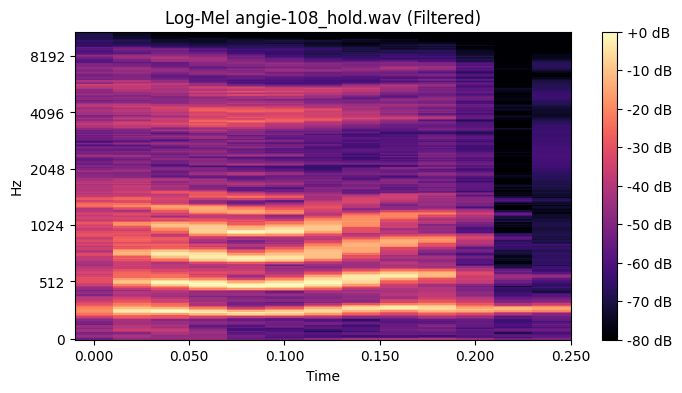

In [41]:
import librosa
import soundfile as sf
from scipy.signal import butter, sosfiltfilt
from scipy.signal.windows import blackman
import matplotlib.pyplot as plt

def butter_lowpass_filter(data, cutoff_freq, sample_rate, order=1):
    nyquist = 0.5 * sample_rate
    normal_cutoff = cutoff_freq / nyquist
    sos = butter(order, normal_cutoff, btype='lowpass',output='sos')
    filtered_data = sosfiltfilt(sos, data)
    return filtered_data

def blackman_window(data):
    blk = blackman(len(data))
    filtered_data = np.multiply(data,blk)
    return filtered_data

def compute_logmel_spectrogram(y, sr, n_mels=256, hop_length=512):
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, hop_length=hop_length)
    logmel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    return logmel_spectrogram



base = r'G:\BioML_Datasets\Split'
data_F = r'G:\BioML_Datasets\DatasetV2_F'
trainpath_F = r'G:\BioML_Datasets\DatasetV2_F\Train'
testpath_F = r'G:\BioML_Datasets\DatasetV2_F\Test'

if os.path.exists(data_F):
    sh.rmtree(data_F)
os.mkdir(data_F)
os.mkdir(trainpath_F)
os.mkdir(testpath_F)
sh.copy(data + '\\train.csv',data_F + '\\train.csv')
sh.copy(data + '\\test_idx.csv',data_F + '\\test_idx.csv')

for file in os.listdir(trainpath):
    audio, sr = librosa.load(os.path.join(trainpath, file))
    audio = butter_lowpass_filter(audio, cutoff_freq=8000, sample_rate=sr)
    # audio = blackman_window(audio)
    clip = librosa.effects.trim(audio,top_db=20)
    audio = clip[0]
    sf.write(os.path.join(trainpath_F,file),audio,sr)
    
for file in os.listdir(testpath):
    audio, sr = librosa.load(os.path.join(testpath, file))
    audio = butter_lowpass_filter(audio, cutoff_freq=8000, sample_rate=sr)
    # audio = blackman_window(audio)
    clip = librosa.effects.trim(audio,top_db=20)
    audio = clip[0]
    sf.write(os.path.join(testpath_F,file),audio,sr)

audio, sr = librosa.load(os.path.join(trainpath, "angie-108_hold.wav"))
logmel_spectrogram = compute_logmel_spectrogram(audio, sr=sr)

plt.figure(figsize=(8, 4))
plt.plot(np.array(range(1,len(audio)+1))/sr,audio)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title('angie-108_hold.wav (Unfiltered)')
plt.figure(figsize=(8, 4))
librosa.display.specshow(logmel_spectrogram, sr=sr, hop_length=441, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel angie-108_hold.wav (Unfiltered)')



audio, sr = librosa.load(os.path.join(trainpath_F, "angie-108_hold.wav"))
logmel_spectrogram = compute_logmel_spectrogram(audio, sr=sr)
plt.figure(figsize=(8, 4))
plt.plot(np.array(range(1,len(audio)+1))/sr,audio)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title('angie-108_hold.wav (Filtered)')
plt.figure(figsize=(8, 4))
librosa.display.specshow(logmel_spectrogram, sr=sr, hop_length=441, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel angie-108_hold.wav (Filtered)')

